<a href="https://colab.research.google.com/github/JaganFoundr/PyTorchNN/blob/main/Image%20Classification/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1
import torch
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import SubsetRandomSampler, DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#2
dataset=CIFAR10(root='./data', download=True, train=True, transform=transforms.ToTensor())
testset=CIFAR10(root='./data', download=True, train=False, transform=transforms.ToTensor())

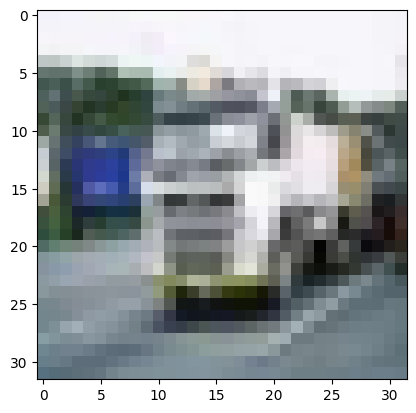

object number:  9
object name:  truck


In [3]:
#3
images, labels = dataset[1000]
rgb_images=images.permute(1,2,0).numpy()
objectname=dataset.classes[labels]
plt.imshow(rgb_images)
plt.show()
print("object number: ", labels)
print("object name: ", objectname)

In [4]:
images.shape

torch.Size([3, 32, 32])

In [5]:
#4
def split(data, valid_percent, seed):
  valid_data=int(data*valid_percent)
  seed=np.random.seed(seed)
  index=np.random.permutation(data)
  return index[valid_data:], index[:valid_data]

training_data, validation_data=split(len(dataset), 0.2, 40)
print("training data: ", len(training_data))
print("validation data: ", len(validation_data))

print("portion of the validation data: ", validation_data[:10])

training data:  40000
validation data:  10000
portion of the validation data:  [22599 38540 32995 37372 26774   578 34812 28062  5012 11968]


In [6]:
#5
train_sampler=SubsetRandomSampler(training_data)
validation_sampler=SubsetRandomSampler(validation_data)

batch_size=100

training_loader=DataLoader(dataset, batch_size, sampler=train_sampler)
validation_loader=DataLoader(dataset, batch_size, sampler=validation_sampler)

In [7]:
#6
CIFARmodel=nn.Sequential(

nn.Conv2d(3,16,3,1,1), #16x16x16
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Conv2d(16,16,3,1,1), #16x8x8
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Conv2d(16,16,3,1,1), #16x4x4
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Conv2d(16,16,3,1,1), #16x2x2
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Conv2d(16,16,3,1,1), #16x1x1
nn.ReLU(),
nn.MaxPool2d(2,2),

nn.Flatten(),
nn.Linear(16,10)

)

In [8]:
#7
for images, labels in training_loader:
  prediction=CIFARmodel(images)

In [9]:
#8
print(prediction[10])

#9
sum_check=torch.sum(prediction[10])
print(sum_check)

changed_pred=F.softmax(prediction, dim=1)
print(torch.sum(changed_pred[10]))

print(changed_pred[10])

tensor([-0.1320,  0.2264,  0.1036, -0.2345, -0.2008, -0.2490, -0.1818, -0.2069,
         0.1106, -0.2304], grad_fn=<SelectBackward0>)
tensor(-0.9950, grad_fn=<SumBackward0>)
tensor(1., grad_fn=<SumBackward0>)
tensor([0.0954, 0.1365, 0.1207, 0.0861, 0.0891, 0.0849, 0.0908, 0.0885, 0.1216,
        0.0865], grad_fn=<SelectBackward0>)


In [10]:
#10
_, pred = torch.max(prediction, dim=1)
print(pred)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])


In [11]:
#11
labels

tensor([1, 6, 5, 9, 5, 8, 5, 3, 0, 7, 3, 2, 5, 2, 4, 3, 6, 9, 9, 0, 3, 4, 6, 2,
        2, 3, 3, 3, 8, 4, 4, 8, 3, 0, 9, 0, 4, 0, 4, 0, 7, 5, 1, 8, 8, 0, 6, 6,
        9, 9, 3, 2, 0, 7, 4, 9, 8, 5, 3, 3, 2, 9, 4, 1, 9, 0, 6, 8, 7, 2, 9, 1,
        2, 4, 6, 2, 2, 5, 3, 5, 3, 6, 6, 6, 7, 3, 0, 4, 3, 1, 8, 2, 7, 4, 5, 3,
        4, 6, 2, 6])

In [12]:
#12
loss_fn=F.cross_entropy


In [13]:
#13
opt=torch.optim.Adam(CIFARmodel.parameters(), lr=0.005)


In [14]:
#14
def accuracy(outputs, labels):
  _,pred=torch.max(outputs, dim=1)
  return torch.sum(pred==labels).item()/len(pred)*100

In [15]:
#15
def loss_batch(CIFARmodel, loss_fn, images, labels, opt, metrics=accuracy):
  prediction=CIFARmodel(images)
  loss=loss_fn(prediction, labels)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_result=None
  if metrics is not None:
    metric_result=metrics(prediction, labels)

  return loss.item(), len(images), metric_result

In [16]:
#16
def evaluate(CIFARmodel, loss_fn, validation_loader, metrics=accuracy):
  with torch.no_grad():
    validation_result=[loss_batch(CIFARmodel, loss_fn, images, labels, opt=None, metrics=accuracy) for images, labels in validation_loader]

    losses, nums, metric = zip(*validation_result)

    total = np.sum(nums)

    avg_loss = np.sum(np.multiply(losses, nums))/total

    metric_result=None
    if metrics is not None:
      metric_result = np.sum(np.multiply(metric, nums))/total

  return avg_loss, total, metric_result

In [30]:
#17
def train(nepochs, CIFARmodel, loss_fn, training_loader, validation_loader, opt, metrics=accuracy):
    # Initialize lists to store metrics for plotting
    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []

    for epoch in range(nepochs):
        # Training phase
        CIFARmodel.train()
        epoch_train_loss, epoch_train_acc = 0, 0
        for images, labels in training_loader:
            train_loss, _, train_acc = loss_batch(CIFARmodel, loss_fn, images, labels, opt, metrics)
            epoch_train_loss += train_loss
            epoch_train_acc += train_acc

        # Average training loss and accuracy
        train_losses.append(epoch_train_loss / len(training_loader))
        train_accuracies.append(epoch_train_acc / len(training_loader))

        # Validation phase
        CIFARmodel.eval()
        valid_loss, _, valid_acc = evaluate(CIFARmodel, loss_fn, validation_loader, metrics)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_acc)

        # Print metrics for the current epoch
        print(f"Epoch {epoch + 1}/{nepochs}")
        print(f"Training Loss: {train_loss:.4f}, Validation Loss: {valid_loss:.4f}")
        print(f"Training Accuracy: {train_acc:.2f}%, Validation Accuracy: {valid_acc:.2f}%")

    # Return all metrics for plotting
    return train_losses, valid_losses, train_accuracies, valid_accuracies

Epoch 1/10
Training Loss: 1.1417, Validation Loss: 1.1912
Training Accuracy: 61.00%, Validation Accuracy: 56.69%
Epoch 2/10
Training Loss: 1.2313, Validation Loss: 1.1712
Training Accuracy: 57.00%, Validation Accuracy: 57.99%
Epoch 3/10
Training Loss: 1.1304, Validation Loss: 1.1405
Training Accuracy: 61.00%, Validation Accuracy: 59.21%
Epoch 4/10
Training Loss: 1.1100, Validation Loss: 1.1771
Training Accuracy: 64.00%, Validation Accuracy: 58.12%
Epoch 5/10
Training Loss: 1.0496, Validation Loss: 1.1736
Training Accuracy: 64.00%, Validation Accuracy: 58.63%
Epoch 6/10
Training Loss: 0.9384, Validation Loss: 1.1583
Training Accuracy: 67.00%, Validation Accuracy: 59.07%
Epoch 7/10
Training Loss: 1.1148, Validation Loss: 1.1318
Training Accuracy: 57.00%, Validation Accuracy: 59.88%
Epoch 8/10
Training Loss: 0.8886, Validation Loss: 1.1396
Training Accuracy: 71.00%, Validation Accuracy: 59.69%
Epoch 9/10
Training Loss: 1.1684, Validation Loss: 1.1454
Training Accuracy: 50.00%, Validation 

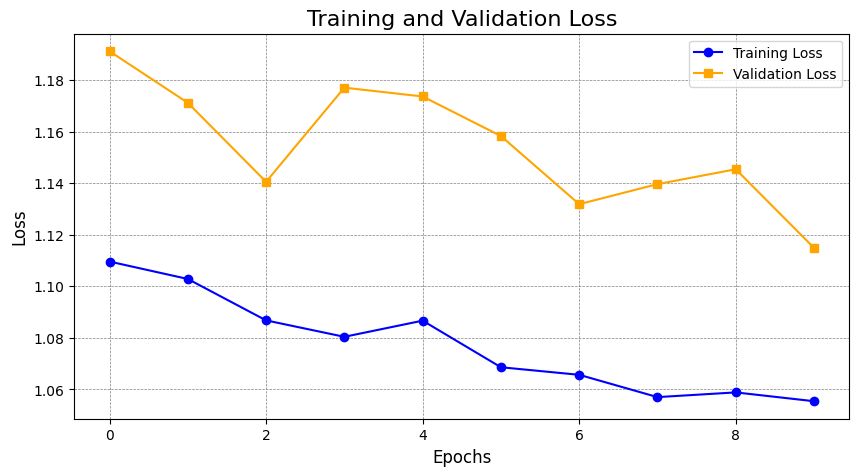

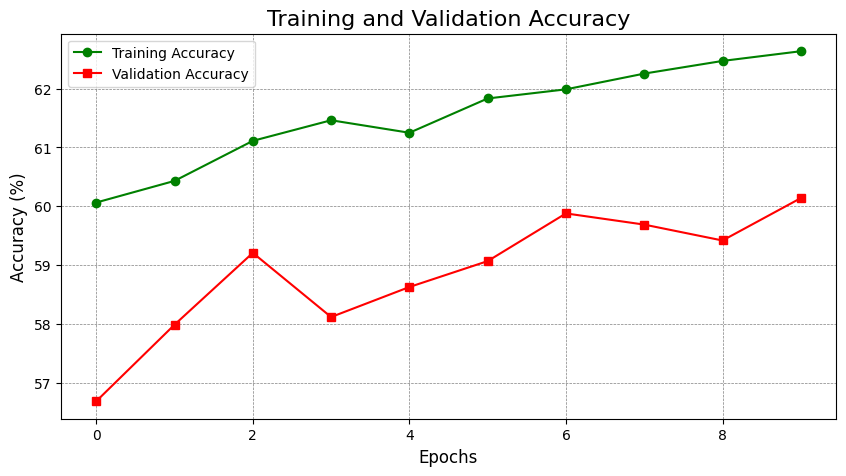

In [31]:
# Call the train function
train_losses, valid_losses, train_accuracies, valid_accuracies = train(
    10, CIFARmodel, loss_fn, training_loader, validation_loader, opt, metrics=accuracy
)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', color='blue', marker='o')
plt.plot(valid_losses, label='Validation Loss', color='orange', marker='s')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot(valid_accuracies, label='Validation Accuracy', color='red', marker='s')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

In [39]:
#18
def prediction(images, CIFARmodel):
  images = images.unsqueeze(0)
  prediction = CIFARmodel(images)
  _, pred = torch.max(prediction, dim=1)
  return pred[0].item()

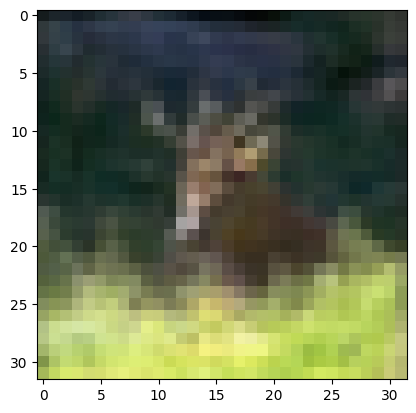

object name:  deer
predicted:  deer
Test loss is 1.2636 and Test accuracy is 54.84%


In [41]:
#19
images, labels = testset[1801]
objectname=dataset.classes[labels]
rgb_images=images.permute(1,2,0).numpy()
plt.imshow(rgb_images)
plt.show()
print("object name: ",objectname)
print("predicted: ",dataset.classes[prediction(images,CIFARmodel)])


#testdata accuracy
test_loader=DataLoader(testset, batch_size=200)
test_loss, _, test_acc=evaluate(CIFARmodel, loss_fn, test_loader, metrics=accuracy)
print(f"Test loss is {test_loss:.4f} and Test accuracy is {test_acc:.2f}%")

In [ ]:
# @title
#20
torch.save(CIFARmodel.state_dict(),'CIFAR.pth')
CIFARmodel.state_dict()

In [36]:
saved_model=CIFARmodel
saved_model.load_state_dict(torch.load('CIFAR.pth'))

<ipython-input-36-38f8a98bc8d6>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_model.load_state_dict(torch.load('CIFAR.pth'))


<All keys matched successfully>